# EDA

In [1]:
import cv2
import pydicom
from pydicom.data import get_testdata_file
from gzip import GzipFile
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

## Đọc dữ liệu

In [2]:
file_path = '/kaggle/input/rsna-breast-cancer-detection/train.csv'
df = pd.read_csv(file_path)


# df_MLO = df[df['view'] != 'MLO']
# cancer_1 = df_MLO[df_MLO['cancer'] == 1].head(25)
# cancer_0 = df_MLO[df_MLO['cancer'] == 0].head(25)
# result = pd.concat([cancer_1, cancer_0])
# print(result)
cancer_1 = df[df['cancer'] == 1].head(25)
cancer_0 = df[df['cancer'] == 0].head(25)
result = pd.concat([cancer_1, cancer_0])
# in ket qua
print(result.head(3))
print("--------------------------------------------------------------------------------")
print(result.tail(3))
# cancer_1
# df_MLO

    site_id  patient_id    image_id laterality view   age  cancer  biopsy  \
87        1       10130   388811999          L  MLO  71.0       1       1   
88        1       10130   613462606          L   CC  71.0       1       1   
89        1       10130  1360338805          L   CC  71.0       1       1   

    invasive  BIRADS  implant density  machine_id  difficult_negative_case  
87         1     0.0        0       B          49                    False  
88         1     0.0        0       B          49                    False  
89         1     0.0        0       B          49                    False  
--------------------------------------------------------------------------------
    site_id  patient_id    image_id laterality view   age  cancer  biopsy  \
22        2       10048  1234933874          L   CC  62.0       0       0   
23        2       10048  1577142909          R  MLO  62.0       0       0   
24        2       10048  1842203124          R   CC  62.0       0      

## Show để so sánh cancer hoặc không cancer

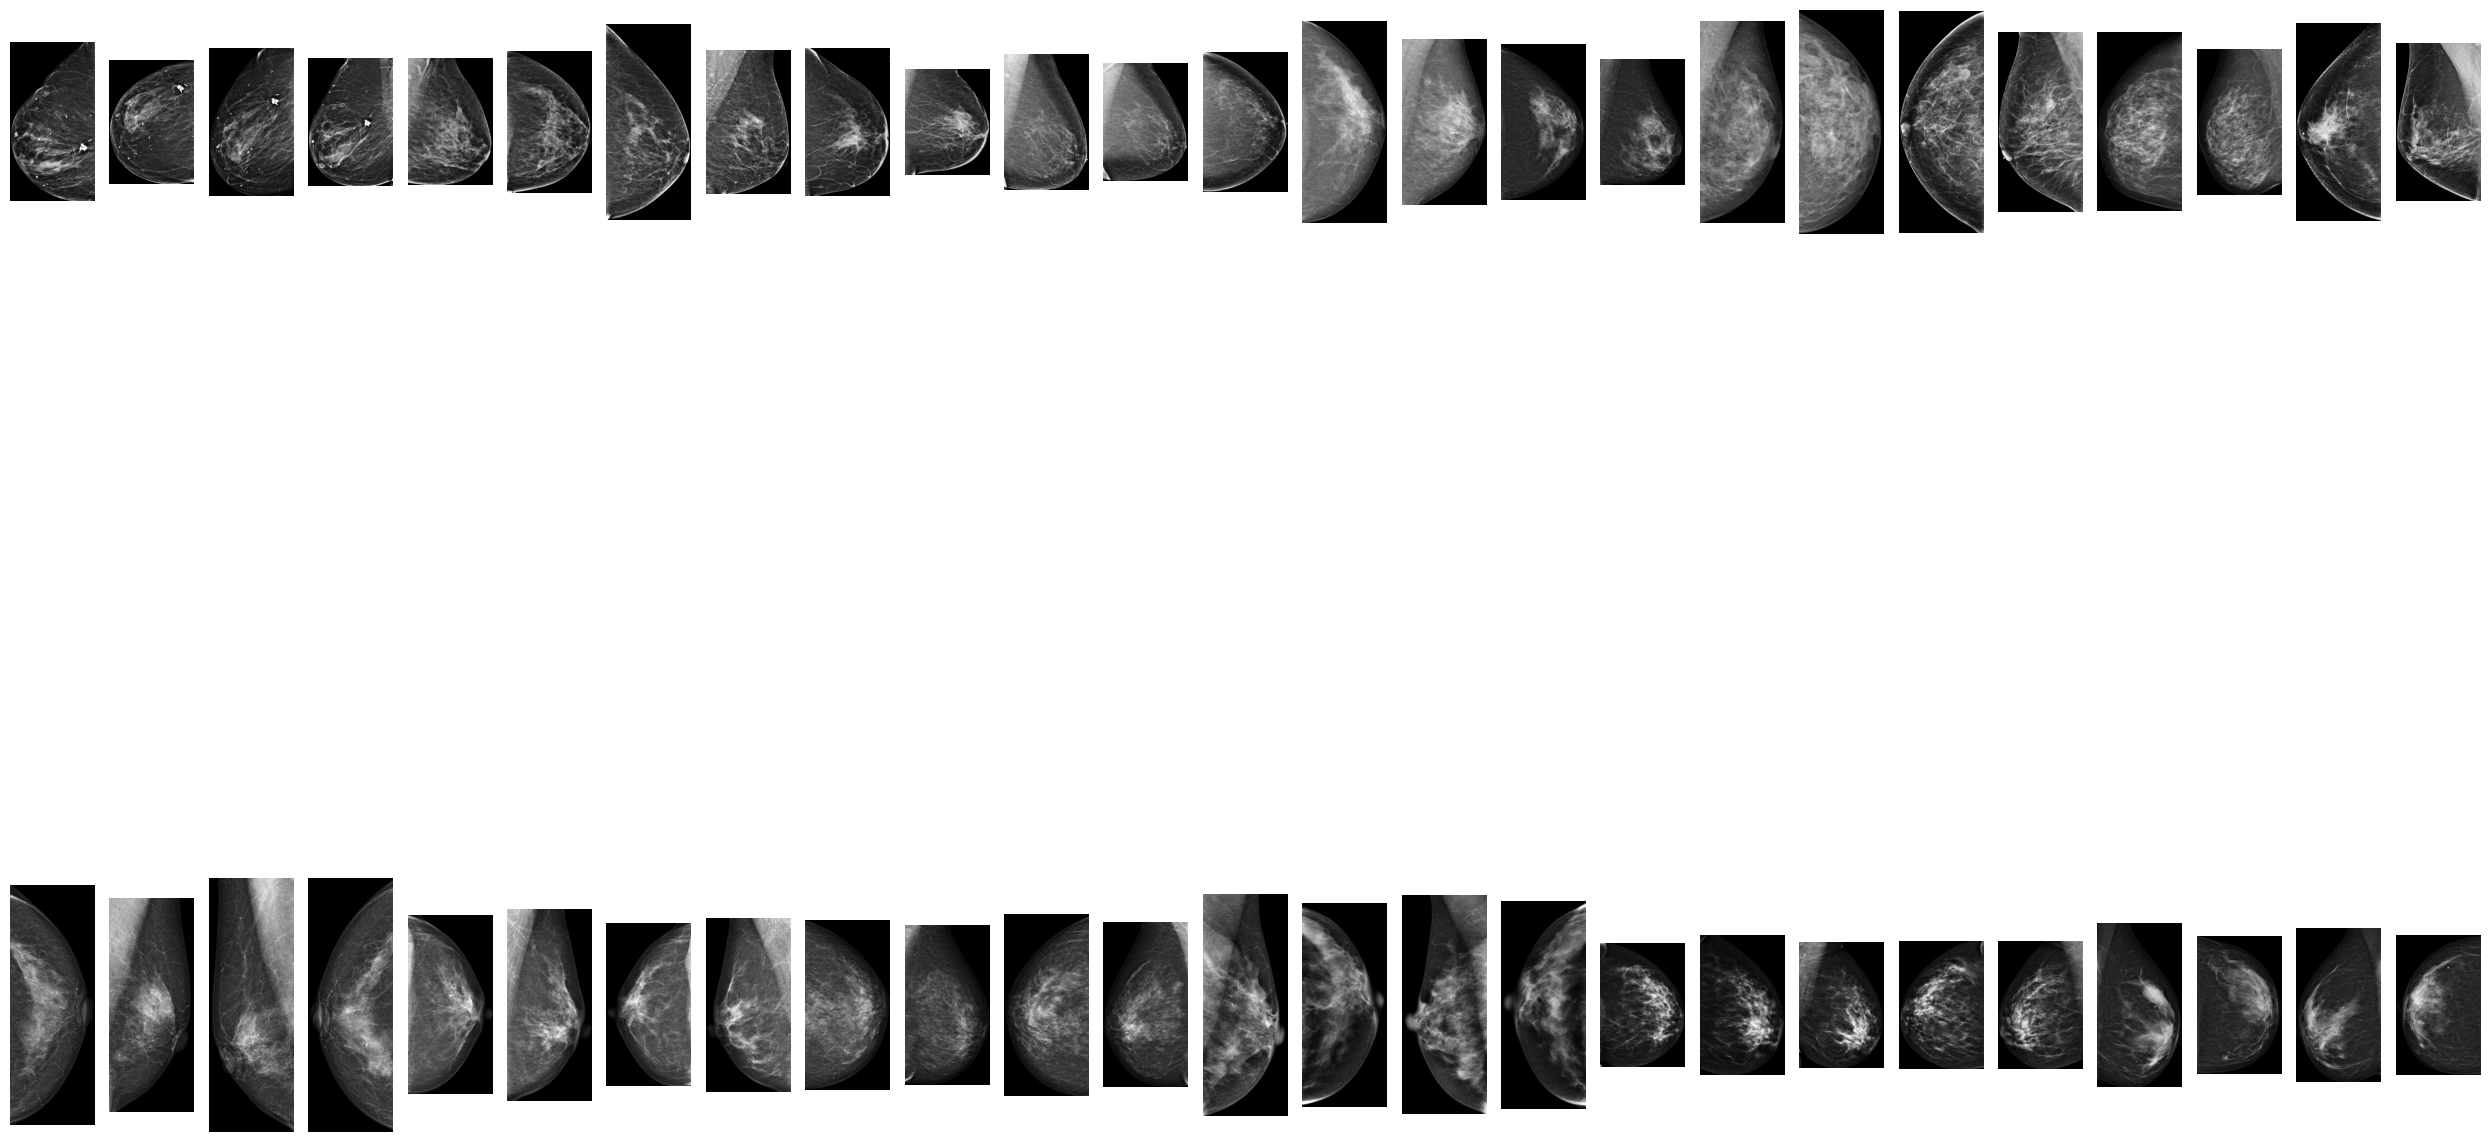

In [3]:
import matplotlib.image as mpimg
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

def load_images_from_paths(image_paths):
    images = []
    for path in image_paths:
        img = Image.open(path)
        images.append(np.array(img))
    return images

def plot_image_grid(images, grid_size=(5, 10), figsize=(25, 25)):
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=figsize)
    axes = axes.flatten()
    
    for img, ax in zip(images, axes):
        ax.imshow(img, cmap='gray')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

image_paths = []

for index, row in result.iterrows():
    temp ='/kaggle/input/rsna-breast-cancer-detection-poi-images/bc_1280_train_lut/'
    img_path = temp + str(row['patient_id']) + '_' + str(row['image_id'])+ '.png'
    image_paths.append(img_path)
images = load_images_from_paths(image_paths)
plot_image_grid(images, grid_size=(2, 25))

## So sánh độ cân bằng

Số lượng ảnh ung thư: 1158
Số lượng ảnh không ung thư: 53548
Tổng số bức ảnh: 54706


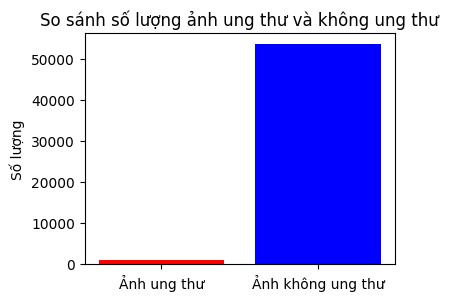

In [4]:
cancer = df[df['cancer'] == 1]
non_cancer = df[df['cancer'] == 0]
cancer_count = len(cancer)
non_cancer_count = len(non_cancer)

print(f'Số lượng ảnh ung thư: {cancer_count}')
print(f'Số lượng ảnh không ung thư: {non_cancer_count}')
print(f'Tổng số bức ảnh: {cancer_count + non_cancer_count}')

labels = ['Ảnh ung thư', 'Ảnh không ung thư']
counts = [cancer_count, non_cancer_count]

# Điều chỉnh kích thước của biểu đồ bằng cách sử dụng figsize
fig, ax = plt.subplots(figsize=(4, 3))  # Kích thước 4x3 inches

ax.bar(labels, counts, color=['red', 'blue'])

ax.set_ylabel('Số lượng')
ax.set_title('So sánh số lượng ảnh ung thư và không ung thư')

plt.show()


Notebook Color Schemes:


/tmp/ipykernel_34/2663228955.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=cancer["age"], rug=True, hist=False,
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na',

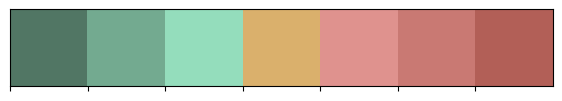

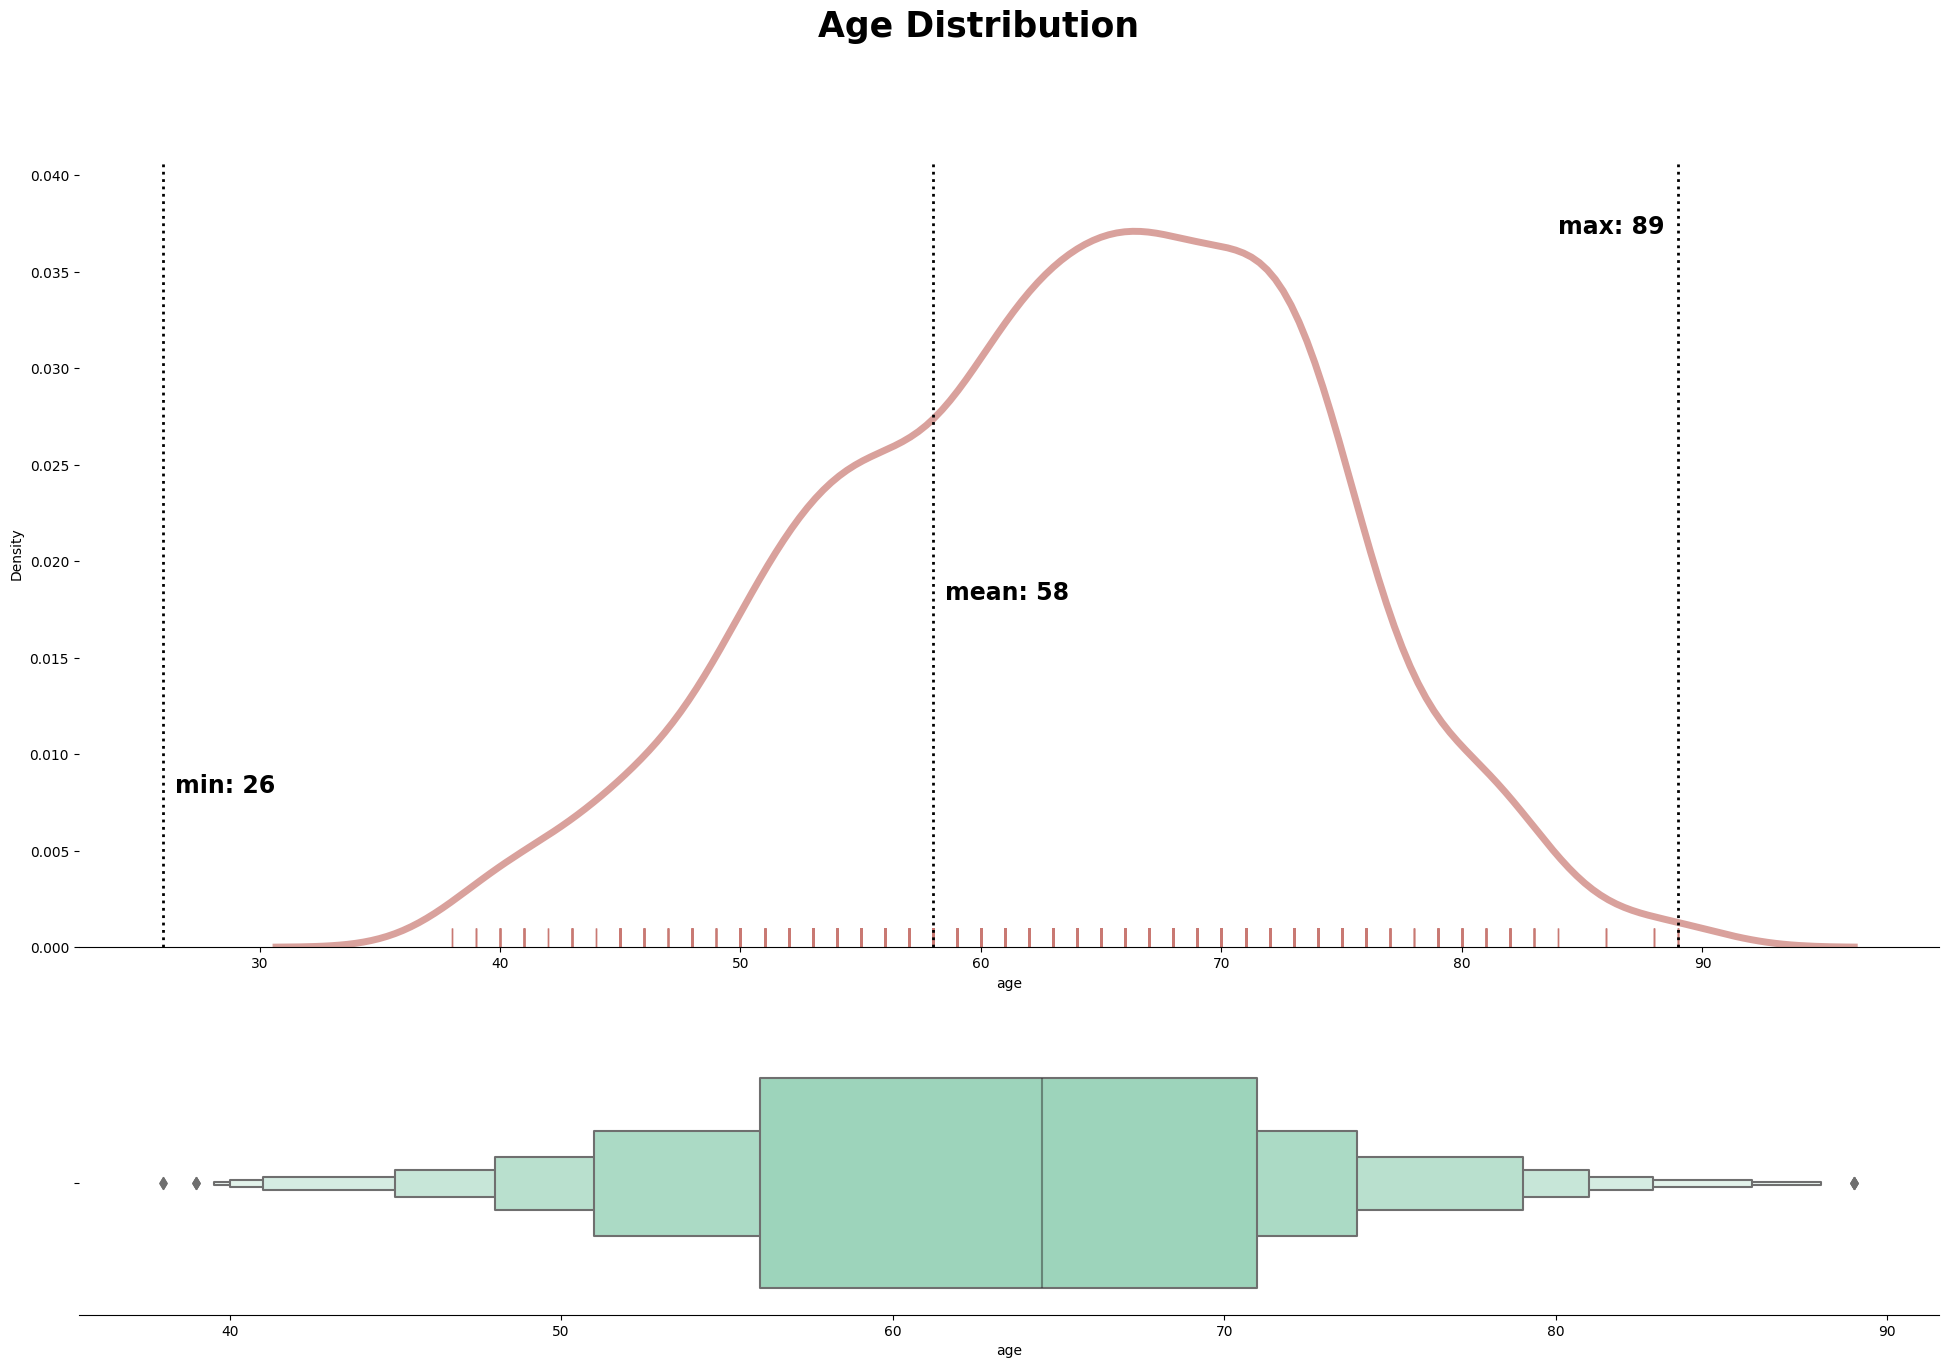

In [5]:
import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
class clr:
    S = '\033[1m' + '\033[91m'
    E = '\033[0m'

my_colors = ["#517664", "#73AA90", "#94DDBC", "#DAB06C", 
             "#DF928E", "#C97973", "#B25F57"]
CMAP1 = ListedColormap(my_colors)

print(clr.S+"Notebook Color Schemes:"+clr.E)
sns.palplot(sns.color_palette(my_colors))


f, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(24, 15))
sns.distplot(a=cancer["age"], rug=True, hist=False, 
             rug_kws={"color": my_colors[5]},
             kde_kws={"color": my_colors[5], "lw": 5, "alpha": 0.7},
             ax=a0)

a0.axvline(x=58, ls=":", lw=2, color="black")
a0.text(x=58.5, y=0.018, s="mean: 58", size=17, color="black", weight="bold")
a0.axvline(x=26, ls=":", lw=2, color="black")
a0.text(x=26.5, y=0.008, s="min: 26", size=17, color="black", weight="bold")
a0.axvline(x=89, ls=":", lw=2, color="black")
a0.text(x=84, y=0.037, s="max: 89", size=17, color="black", weight="bold")

sns.boxenplot(x=cancer["age"], ax=a1, color=my_colors[2])

plt.suptitle("Age Distribution", weight="bold", size=25)
sns.despine(right=True, top=True, left=True);

## EDA thử

In [6]:
image_paths_cancer = image_paths[0] 
image_paths_non_cancer = image_paths[-5]


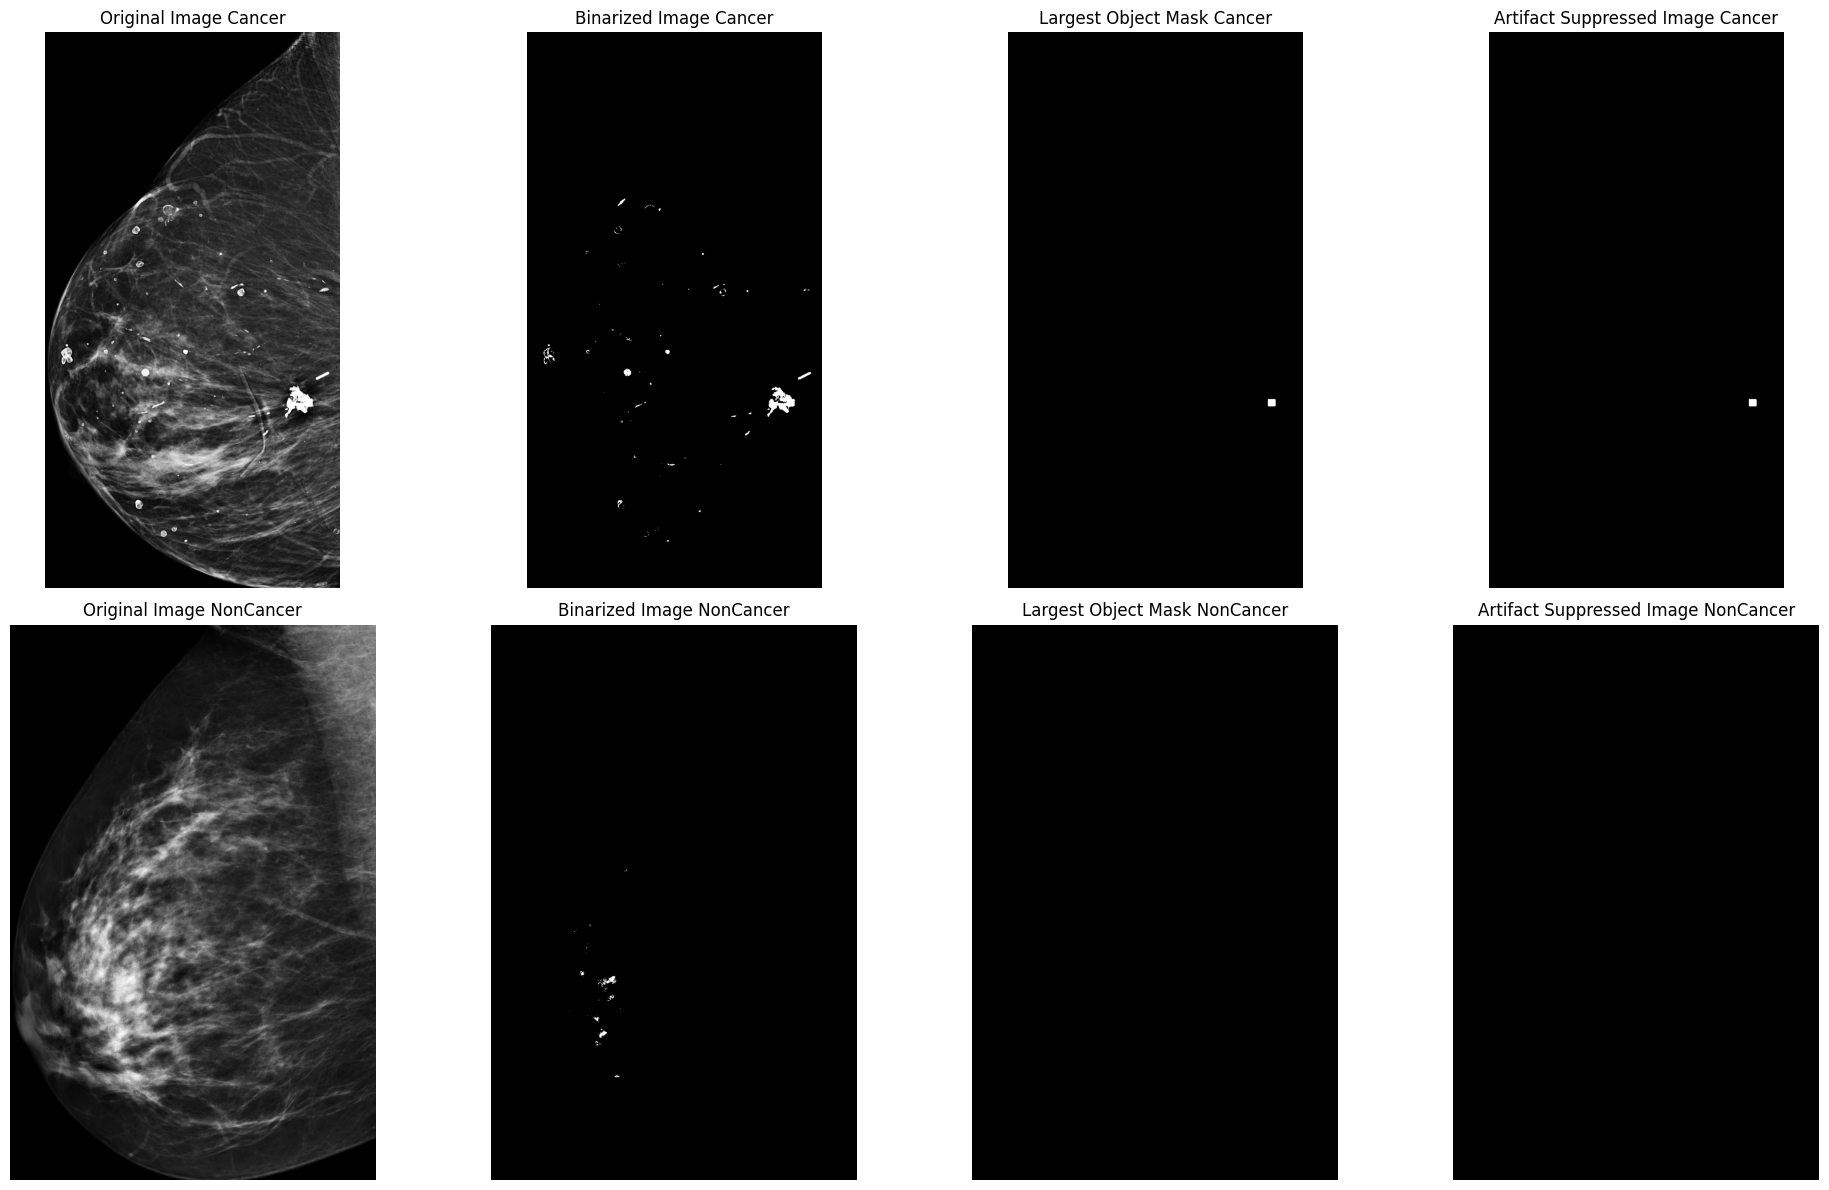

In [7]:


import cv2
import numpy as np
import matplotlib.pyplot as plt

def select_largest_obj(img_bin, lab_val=255, fill_holes=False, 
                       smooth_boundary=False, kernel_size=15):
    n_labels, img_labeled, lab_stats, _ = cv2.connectedComponentsWithStats(
        img_bin, connectivity=8, ltype=cv2.CV_32S)
    largest_obj_lab = np.argmax(lab_stats[1:, 4]) + 1
    largest_mask = np.zeros(img_bin.shape, dtype=np.uint8)
    largest_mask[img_labeled == largest_obj_lab] = lab_val
    if fill_holes:
        bkg_locs = np.where(img_labeled == 0)
        bkg_seed = (bkg_locs[0][0], bkg_locs[1][0])
        img_floodfill = largest_mask.copy()
        h_, w_ = largest_mask.shape
        mask_ = np.zeros((h_ + 2, w_ + 2), dtype=np.uint8)
        cv2.floodFill(img_floodfill, mask_, seedPoint=bkg_seed, newVal=lab_val)
        holes_mask = cv2.bitwise_not(img_floodfill)  # mask of the holes.
        largest_mask = largest_mask + holes_mask
    if smooth_boundary:
        kernel_ = np.ones((kernel_size, kernel_size), dtype=np.uint8)
        largest_mask = cv2.morphologyEx(largest_mask, cv2.MORPH_OPEN, kernel_)
        
    return largest_mask

def process_image(image_path, threshold=230):
    image_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image_array.dtype != np.uint8:
        image_array = cv2.normalize(image_array, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    _, binary_image = cv2.threshold(image_array, threshold, 255, cv2.THRESH_BINARY)
    largest_object_mask = select_largest_obj(binary_image, lab_val=255, fill_holes=True, smooth_boundary=True, kernel_size=15)
    result_image = cv2.bitwise_and(image_array, largest_object_mask)
    return image_array, binary_image, largest_object_mask, result_image

# Đường dẫn tới các ảnh .png
image_pathCancer = cancer
image_pathNonCancer = non_cancer

# Process both images
image_arrayCancer, binary_imageCancer, largest_object_maskCancer, result_imageCancer = process_image(image_paths_cancer)
image_arrayNonCancer, binary_imageNonCancer, largest_object_maskNonCancer, result_imageNonCancer = process_image(image_paths_non_cancer)

# Display the images in a single row
fig, axes = plt.subplots(2, 4, figsize=(20, 12))

# Display Original Image Cancer
axes[0, 0].imshow(image_arrayCancer, cmap='gray')
axes[0, 0].set_title('Original Image Cancer')
axes[0, 0].axis('off')

# Display Binarized Image Cancer
axes[0, 1].imshow(binary_imageCancer, cmap='gray')
axes[0, 1].set_title('Binarized Image Cancer')
axes[0, 1].axis('off')

# Display Largest Object Mask Cancer
axes[0, 2].imshow(largest_object_maskCancer, cmap='gray')
axes[0, 2].set_title('Largest Object Mask Cancer')
axes[0, 2].axis('off')

# Display Artifact Suppressed Image Cancer
axes[0, 3].imshow(result_imageCancer, cmap='gray')
axes[0, 3].set_title('Artifact Suppressed Image Cancer')
axes[0, 3].axis('off')

# Display Original Image NonCancer
axes[1, 0].imshow(image_arrayNonCancer, cmap='gray')
axes[1, 0].set_title('Original Image NonCancer')
axes[1, 0].axis('off')

# Display Binarized Image NonCancer
axes[1, 1].imshow(binary_imageNonCancer, cmap='gray')
axes[1, 1].set_title('Binarized Image NonCancer')
axes[1, 1].axis('off')

# Display Largest Object Mask NonCancer
axes[1, 2].imshow(largest_object_maskNonCancer, cmap='gray')
axes[1, 2].set_title('Largest Object Mask NonCancer')
axes[1, 2].axis('off')

# Display Artifact Suppressed Image NonCancer
axes[1, 3].imshow(result_imageNonCancer, cmap='gray')
axes[1, 3].set_title('Artifact Suppressed Image NonCancer')
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()

* Do có su chenh lech giua cac mat cat ne nhom chung em quyet dinh sai nguon cho 195 *

# PYTORCH DATASET

In [8]:
from sklearn.preprocessing import LabelEncoder, normalize

In [9]:
# Keep only columns in test + target variable and reset the index
train = df[["patient_id", "image_id", "laterality", "age", "implant", "cancer"]].reset_index(drop=True)

base_path = "/kaggle/input/rsna-breast-cancer-detection-poi-images/bc_1280_train_lut/"

# Add the 'path' column
train['path'] = base_path + train['patient_id'].astype(str) + "_" + train['image_id'].astype(str) + ".png"

# Encode categorical variables
le_laterality = LabelEncoder()
le_view = LabelEncoder()

train['laterality'] = le_laterality.fit_transform(df['laterality'])
train['view'] = le_view.fit_transform(df['view'])

train.head()

,patient_id,image_id,laterality,age,implant,cancer,path,view
0,10006,462822612,0,61.0,0,0,/kaggle/input/rsna-breast-cancer-detection-poi...,1
1,10006,1459541791,0,61.0,0,0,/kaggle/input/rsna-breast-cancer-detection-poi...,5
2,10006,1864590858,1,61.0,0,0,/kaggle/input/rsna-breast-cancer-detection-poi...,5
3,10006,1874946579,1,61.0,0,0,/kaggle/input/rsna-breast-cancer-detection-poi...,1
4,10011,220375232,0,55.0,0,0,/kaggle/input/rsna-breast-cancer-detection-poi...,1


In [10]:
train

,patient_id,image_id,laterality,age,implant,cancer,path,view
0,10006,462822612,0,61.0,0,0,/kaggle/input/rsna-breast-cancer-detection-poi...,1
1,10006,1459541791,0,61.0,0,0,/kaggle/input/rsna-breast-cancer-detection-poi...,5
2,10006,1864590858,1,61.0,0,0,/kaggle/input/rsna-breast-cancer-detection-poi...,5
3,10006,1874946579,1,61.0,0,0,/kaggle/input/rsna-breast-cancer-detection-poi...,1
4,10011,220375232,0,55.0,0,0,/kaggle/input/rsna-breast-cancer-detection-poi...,1
...,...,...,...,...,...,...,...,...
54701,9973,1729524723,1,43.0,0,0,/kaggle/input/rsna-breast-cancer-detection-poi...,5
54702,9989,63473691,0,60.0,0,0,/kaggle/input/rsna-breast-cancer-detection-poi...,5
54703,9989,1078943060,0,60.0,0,0,/kaggle/input/rsna-breast-cancer-detection-poi...,1
54704,9989,398038886,1,60.0,0,0,/kaggle/input/rsna-breast-cancer-detection-poi...,5


In [11]:
print(clr.S+"Number of missing values in Age:"+clr.E, train["age"].isna().sum())
train['age'] = train['age'].fillna(58)

Number of missing values in Age: 37


In [12]:
!pip install -q efficientnet_pytorch

In [13]:
# General Libraries
import os
import re
import gc
import cv2
import wandb
import random
import math
from glob import glob
from tqdm import tqdm
from pprint import pprint
from time import time
import datetime as dtime
from datetime import datetime
import itertools
import warnings
import pandas as pd
import numpy as np
from skimage.transform import resize
from sklearn.preprocessing import LabelEncoder, normalize

# For the Visuals
import seaborn as sns
import matplotlib as mpl
from matplotlib import cm
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Rectangle
from IPython.display import display_html
import torch
import torch.nn as nn
from torchvision.models import resnext50_32x4d
plt.rcParams.update({'font.size': 16})

# Environment check
warnings.filterwarnings("ignore")
os.environ["WANDB_SILENT"] = "true"
CONFIG = {'competition': 'RSNA_Breast_Cancer', '_wandb_kernel': 'aot'}

# Custom colors
class clr:
    S = '\033[1m' + '\033[91m'
    E = '\033[0m'
    
my_colors = ["#517664", "#73AA90", "#94DDBC", "#DAB06C", 
             "#DF928E", "#C97973", "#B25F57"]
CMAP1 = ListedColormap(my_colors)

In [14]:
import random
# PyTorch
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch import FloatTensor, LongTensor
from torch.utils.data import Dataset, DataLoader, Subset
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Data Augmentation for Image Preprocessing
from albumentations import (ToFloat, Normalize, VerticalFlip, HorizontalFlip, Compose, Resize,
                            RandomBrightnessContrast, HueSaturationValue, Blur, GaussNoise,
                            Rotate, RandomResizedCrop, ShiftScaleRotate, ToGray)
from albumentations.pytorch import ToTensorV2

from efficientnet_pytorch import EfficientNet
from torchvision.models import resnet34, resnet50

# SKlearn
from sklearn.model_selection import StratifiedKFold, GroupKFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

def set_seed(seed = 1234):
    '''Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.'''
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)

def show_values_on_bars(axs, h_v="v", space=0.4):
    '''Plots the value at the end of the a seaborn barplot.
    axs: the ax of the plot
    h_v: weather or not the barplot is vertical/ horizontal'''
    
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, format(value, ','), ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, format(value, ','), ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        


# Seed
set_seed()
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device available now:', DEVICE)

# Read in Data
# train = pd.read_csv(file_path)

Device available now: cuda


In [15]:
# ----- GLOBAL PARAMS -----
vertical_flip = 0.5
horizontal_flip = 0.5

csv_columns = ['laterality', 'view', 'age', 'implant']
no_columns = len(csv_columns)
output_size = 1
# -------------------------

In [16]:
from PIL import Image
import numpy as np
from torch.utils.data import Dataset
from albumentations import Compose, RandomResizedCrop, ShiftScaleRotate, HorizontalFlip, VerticalFlip
from albumentations.pytorch import ToTensorV2

class RSNADataset(Dataset):
    
    def __init__(self, dataframe, vertical_flip, horizontal_flip, is_train=True):
        self.dataframe = dataframe
        self.is_train = is_train
        self.vertical_flip = vertical_flip
        self.horizontal_flip = horizontal_flip
        
        # Data Augmentation (custom for each dataset type)
        if is_train:
            self.transform = Compose([
                RandomResizedCrop(height=224, width=224),
                ShiftScaleRotate(rotate_limit=90, scale_limit=[0.8, 1.2]),
                HorizontalFlip(p=self.horizontal_flip),
                VerticalFlip(p=self.vertical_flip),
                ToTensorV2()
            ])
        else:
            self.transform = Compose([
                ToTensorV2()
            ])
            
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, index):
        '''Take each row in batch at a time.'''
        
        # Select path and read image
        image_path = self.dataframe['path'][index]
        image = Image.open(image_path).convert('RGB')
        image = np.array(image).astype(np.float32)
        
        # For this image also import .csv information
        csv_row = self.dataframe.iloc[index][csv_columns]
        csv_data = []
        for value in csv_row:
            try:
                csv_data.append(float(value))
            except ValueError:
                # Handle the case where conversion fails
                csv_data.append(np.nan)  # or some other default value
                print(f"Warning: Unable to convert value '{value}' to float.")
        
        csv_data = np.array(csv_data, dtype=np.float32)
        
        # Apply transforms
        # albumentations expects a dictionary with an 'image' key
        transformed = self.transform(image=image)
        transf_image = transformed['image']
        
        # Return info
        if self.is_train:
            return {"image": transf_image, 
                    "meta": csv_data, 
                    "target": self.dataframe['cancer'][index]}
        else:
            return {"image": transf_image, 
                    "meta": csv_data}


In [17]:
def data_to_device(data):
    image, metadata, targets = data.values()
    return image.to(DEVICE), metadata.to(DEVICE), targets.to(DEVICE)

In [18]:
# Sample data
# train = 
# Instantiate Dataset object
dataset = RSNADataset(train.head(6), vertical_flip, horizontal_flip,
                      is_train=True)
# # The Dataloader
dataloader = DataLoader(dataset, batch_size=3, shuffle=False)

# Output of the Dataloader
for k, data in enumerate(dataloader):
    image, meta, targets = data_to_device(data)
    print(clr.S + f"Batch: {k}" + clr.E, "\n" +
          clr.S + "Image:" + clr.E, image.shape, "\n" +
          clr.S + "Meta:" + clr.E, meta, "\n" +
          clr.S + "Targets:" + clr.E, targets, "\n" +
          "="*50)

Batch: 0 
Image: torch.Size([3, 3, 224, 224]) 
Meta: tensor([[ 0.,  1., 61.,  0.],
        [ 0.,  5., 61.,  0.],
        [ 1.,  5., 61.,  0.]], device='cuda:0') 
Targets: tensor([0, 0, 0], device='cuda:0') 
Batch: 1 
Image: torch.Size([3, 3, 224, 224]) 
Meta: tensor([[ 1.,  1., 61.,  0.],
        [ 0.,  1., 55.,  0.],
        [ 0.,  5., 55.,  0.]], device='cuda:0') 
Targets: tensor([0, 0, 0], device='cuda:0') 


# NET WORK


## Resnet50

In [19]:
class ResNet50Network(nn.Module):
    def __init__(self, output_size, no_columns):
        super().__init__()
        self.no_columns, self.output_size = no_columns, output_size
        
        # Define Feature part (IMAGE)
        self.features = resnet50(pretrained=True) # 1000 neurons out
        # (metadata)
        self.csv = nn.Sequential(nn.Linear(self.no_columns, 500),
                                 nn.BatchNorm1d(500),
                                 nn.ReLU(),
                                 nn.Dropout(p=0.2))
        
        # Define Classification part
        self.classification = nn.Linear(1000 + 500, output_size)
        
        
    def forward(self, image, meta, prints=False):
        if prints: print('Input Image shape:', image.shape, '\n'+
                         'Input metadata shape:', meta.shape)
        
        # Image CNN
        image = self.features(image)
        if prints: print('Features Image shape:', image.shape)
        
        # CSV FNN
        meta = self.csv(meta)
        if prints: print('Meta Data:', meta.shape)
            
        # Concatenate layers from image with layers from csv_data
        image_meta_data = torch.cat((image, meta), dim=1)
        if prints: print('Concatenated Data:', image_meta_data.shape)
        
        # CLASSIF
        out = self.classification(image_meta_data)
        if prints: print('Out shape:', out.shape)
        
        return out

In [20]:
# Load Model
model_example = ResNet50Network(output_size=output_size, no_columns=no_columns).to(DEVICE)

# Outputs
out = model_example(image, meta, prints=True)

# Criterion example
criterion_example = nn.BCEWithLogitsLoss()
# Unsqueeze(1) from shape=[3] to shape=[3, 1]
loss = criterion_example(out, targets.unsqueeze(1).float()) 
print("="*50)
print(clr.S+'Loss:'+clr.E, loss.item())

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 165MB/s] 


Input Image shape: torch.Size([3, 3, 224, 224]) 
Input metadata shape: torch.Size([3, 4])
Features Image shape: torch.Size([3, 1000])
Meta Data: torch.Size([3, 500])
Concatenated Data: torch.Size([3, 1500])
Out shape: torch.Size([3, 1])
Loss: 0.8288737535476685


## ResNeXt50

In [21]:
class ResNeXt50Network(nn.Module):
    def __init__(self, output_size, no_columns):
        super().__init__()
        self.no_columns, self.output_size = no_columns, output_size
        
        # Define Feature part (IMAGE) using ResNeXt
        self.features = resnext50_32x4d(pretrained=True)  # 1000 neurons out
        
        # (metadata)
        self.csv = nn.Sequential(nn.Linear(self.no_columns, 500),
                                 nn.BatchNorm1d(500),
                                 nn.ReLU(),
                                 nn.Dropout(p=0.2))
        
        # Define Classification part
        self.classification = nn.Linear(1000 + 500, output_size)
        
    def forward(self, image, meta, prints=False):
        if prints: print('Input Image shape:', image.shape, '\n' +
                         'Input metadata shape:', meta.shape)
        
        # Image CNN
        image = self.features(image)
        if prints: print('Features Image shape:', image.shape)
        
        # CSV FNN
        meta = self.csv(meta)
        if prints: print('Meta Data:', meta.shape)
            
        # Concatenate layers from image with layers from csv_data
        image_meta_data = torch.cat((image, meta), dim=1)
        if prints: print('Concatenated Data:', image_meta_data.shape)
        
        # CLASSIF
        out = self.classification(image_meta_data)
        if prints: print('Out shape:', out.shape)
        
        return out


In [22]:
# Load Model
model_example = ResNeXt50Network(output_size=output_size, no_columns=no_columns).to(DEVICE)

# Outputs
out = model_example(image, meta, prints=True)

# Criterion example
criterion_example = nn.BCEWithLogitsLoss()
# Unsqueeze(1) from shape=[3] to shape=[3, 1]
loss = criterion_example(out, targets.unsqueeze(1).float()) 
print("="*50)
print(clr.S+'Loss:'+clr.E, loss.item())

Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 95.8M/95.8M [00:00<00:00, 135MB/s] 


Input Image shape: torch.Size([3, 3, 224, 224]) 
Input metadata shape: torch.Size([3, 4])
Features Image shape: torch.Size([3, 1000])
Meta Data: torch.Size([3, 500])
Concatenated Data: torch.Size([3, 1500])
Out shape: torch.Size([3, 1])
Loss: 0.4634789228439331


# TRAINING

In [23]:
def add_in_file(text, f):
    
    with open(f'logs_{VERSION}.txt', 'a+') as f:
        print(text, file=f)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt

def train_folds(model, train_original):
    # Creates a .txt file that will contain the logs
    # logs == what we also print to console
    f = open(f"logs_{VERSION}.txt", "w+")
    
    # Split in folds
    group_fold = GroupKFold(n_splits=FOLDS)

    # Generate indices to split data into training and test set.
    k_folds = group_fold.split(X=np.zeros(len(train_original)), 
                               y=train_original['cancer'], 
                               groups=train_original['patient_id'].tolist())
    
    # For each fold
    for i, (train_index, valid_index) in enumerate(k_folds):
        
        print(clr.S+f"---------- Fold: {i+1} ----------"+clr.E)
        add_in_file(f"---------- Fold: {i+1} ----------", f)
        
        # 🐝 W&B Tracking
        RUN_CONFIG = CONFIG.copy()
        params = dict(model=MODEL, 
                      version=VERSION,
                      fold=i,
                      epochs=EPOCHS, 
                      batch=BATCH_SIZE1,
                      lr=LR,
                      weight_decay=WD)
        RUN_CONFIG.update(params)
#         run = wandb.init(project='RSNA_Breast_Cancer', config=RUN_CONFIG)

#         wandb.watch(model, log_freq=100) # 🐝

        # --- Create Instances ---
        best_roc = None
        patience_f = PATIENCE

        optimizer = torch.optim.Adam(model.parameters(), lr=LR, 
                                     weight_decay=WD)
        scheduler = ReduceLROnPlateau(optimizer=optimizer, mode='max', 
                                      patience=LR_PATIENCE, verbose=True, factor=LR_FACTOR)
        criterion = nn.BCEWithLogitsLoss()

        # --- Read in Data ---
        train_data = train_original.iloc[train_index].reset_index(drop=True)
        valid_data = train_original.iloc[valid_index].reset_index(drop=True)

        # Create Data instances
        train = RSNADataset(train_data, vertical_flip, horizontal_flip, 
                            is_train=True)
        valid = RSNADataset(valid_data, vertical_flip, horizontal_flip,
                            is_train=True)

        # Dataloaders
        train_loader = DataLoader(train, batch_size=BATCH_SIZE1, 
                                  shuffle=True, num_workers=WORKERS)
        valid_loader = DataLoader(valid, batch_size=BATCH_SIZE2, 
                                  shuffle=False, num_workers=WORKERS)

        # Lists to store losses
        train_losses_list = []
        valid_losses_list = []

        # === EPOCHS ===
        for epoch in range(EPOCHS):
            start_time = time()
            correct = 0
            train_losses = 0

            # === TRAIN ===
            model.train()

            for k, data in tqdm(enumerate(train_loader)):
                image, meta, targets = data_to_device(data)
                optimizer.zero_grad()
                out = model(image, meta)
                loss = criterion(out, targets.unsqueeze(1).float())
                loss.backward()
                optimizer.step()

                train_losses += loss.item()
                train_preds = torch.round(torch.sigmoid(out)) 
                correct += (train_preds.cpu() == targets.cpu().unsqueeze(1)).sum().item()

            train_acc = correct / len(train_index)
            train_losses_list.append(train_losses / len(train_loader))  # Store avg train loss

            # === EVAL ===
            model.eval()
            valid_preds = torch.zeros(size=(len(valid_index), 1), 
                                      device=DEVICE, dtype=torch.float32)
            valid_losses = 0

            with torch.no_grad():
                for k, data in tqdm(enumerate(valid_loader)):
                    image, meta, targets = data_to_device(data)
                    out = model(image, meta)
                    pred = torch.sigmoid(out)
                    valid_preds[k*image.shape[0]:k*image.shape[0] + image.shape[0]] = pred

                    # Calculate validation loss
                    valid_loss = criterion(out, targets.unsqueeze(1).float())
                    valid_losses += valid_loss.item()

                valid_acc = accuracy_score(valid_data['cancer'].values, 
                                           torch.round(valid_preds.cpu()))
                valid_roc = roc_auc_score(valid_data['cancer'].values, 
                                          valid_preds.cpu())
                valid_losses_list.append(valid_losses / len(valid_loader))  # Store avg valid loss

                duration = str(dtime.timedelta(seconds=time() - start_time))[:7]

                final_logs = '{} | Epoch: {}/{} | Loss: {:.4} | Acc_tr: {:.3} | Acc_vd: {:.3} | ROC: {:.3}'.\
                                format(duration, epoch+1, EPOCHS, 
                                       train_losses, train_acc, valid_acc, valid_roc)
                add_in_file(final_logs,f)
                print(final_logs)

                # === CONFUSION MATRIX ===
                cm = confusion_matrix(valid_data['cancer'].values, torch.round(valid_preds.cpu()))
                print("Confusion Matrix:")
                print(cm)
                print("Classification Report:")
                print(classification_report(valid_data['cancer'].values, torch.round(valid_preds.cpu())))

                # Save the confusion matrix and report to log file
                add_in_file(f"Confusion Matrix:\n{cm}\n", f)
                add_in_file(f"Classification Report:\n{classification_report(valid_data['cancer'].values, torch.round(valid_preds.cpu()))}\n", f)

                # === SAVE MODEL ===
                scheduler.step(valid_roc)
                model_name = f"Fold{i+1}_Epoch{epoch+1}_ValidAcc{valid_acc:.3f}_ROC{valid_roc:.3f}.pth"

                if not best_roc: 
                    best_roc = valid_roc
                    torch.save(model.state_dict(), model_name)
                    continue

                if valid_roc > best_roc:
                    best_roc = valid_roc
                    patience_f = PATIENCE
                    torch.save(model.state_dict(), model_name)
                else:
                    patience_f = patience_f - 1
                    if patience_f == 0:
                        stop_logs = 'Early stopping (no improvement since 3 models) | Best ROC: {}'.\
                                    format(best_roc)
                        add_in_file(stop_logs, f)
                        print(stop_logs)
                        break

        # Plot training and validation loss
        plt.figure(figsize=(10, 5))
        plt.plot(range(1, len(train_losses_list) + 1), train_losses_list, label='Training Loss')
        plt.plot(range(1, len(valid_losses_list) + 1), valid_losses_list, label='Validation Loss')
        plt.title(f"Fold {i+1} - Loss over Epochs")
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()

        del train, valid, train_loader, valid_loader, image, targets
        gc.collect()


## Train Resnet50

In [25]:
train

,patient_id,image_id,laterality,age,implant,cancer,path,view
0,10006,462822612,0,61.0,0,0,/kaggle/input/rsna-breast-cancer-detection-poi...,1
1,10006,1459541791,0,61.0,0,0,/kaggle/input/rsna-breast-cancer-detection-poi...,5
2,10006,1864590858,1,61.0,0,0,/kaggle/input/rsna-breast-cancer-detection-poi...,5
3,10006,1874946579,1,61.0,0,0,/kaggle/input/rsna-breast-cancer-detection-poi...,1
4,10011,220375232,0,55.0,0,0,/kaggle/input/rsna-breast-cancer-detection-poi...,1
...,...,...,...,...,...,...,...,...
54701,9973,1729524723,1,43.0,0,0,/kaggle/input/rsna-breast-cancer-detection-poi...,5
54702,9989,63473691,0,60.0,0,0,/kaggle/input/rsna-breast-cancer-detection-poi...,5
54703,9989,1078943060,0,60.0,0,0,/kaggle/input/rsna-breast-cancer-detection-poi...,1
54704,9989,398038886,1,60.0,0,0,/kaggle/input/rsna-breast-cancer-detection-poi...,5


In [26]:
# Filter images with cancer = 0 and cancer = 1
cancer_0 = train[train['cancer'] == 0].sample(n=1000, random_state=42)
cancer_1 = train[train['cancer'] == 1].sample(n=1000, random_state=42)

# Concatenate the two sets to get a balanced dataset
balanced_dataset = pd.concat([cancer_0, cancer_1]).reset_index(drop=True)

# Optional: Shuffle the dataset if needed
balanced_dataset = balanced_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the result
print(balanced_dataset.head())
print(f"Balanced dataset size: {balanced_dataset.shape}")

   patient_id    image_id  laterality   age  implant  cancer  \
0       65198   712545807           1  72.0        0       1   
1       55706  1978239510           1  51.0        0       0   
2        4917  1773963138           1  60.0        0       1   
3       62634  1788417811           0  53.0        0       0   
4       47212   424911657           1  68.0        0       1   

                                                path  view  
0  /kaggle/input/rsna-breast-cancer-detection-poi...     5  
1  /kaggle/input/rsna-breast-cancer-detection-poi...     1  
2  /kaggle/input/rsna-breast-cancer-detection-poi...     5  
3  /kaggle/input/rsna-breast-cancer-detection-poi...     5  
4  /kaggle/input/rsna-breast-cancer-detection-poi...     1  
Balanced dataset size: (2000, 8)


In [27]:
# FOLDS = 3
# EPOCHS = 50
# PATIENCE = 3
# WORKERS = 8
# LR = 0.0005
# WD = 0.0
# LR_PATIENCE = 1            # 1 model not improving until lr is decreasing
# LR_FACTOR = 0.4            # by how much the lr is decreasing

# BATCH_SIZE1 = 64           # for train
# BATCH_SIZE2 = 16           # for valid

# VERSION = 'v1'
# MODEL = 'resnet50'

# model1 = ResNet50Network(output_size=output_size, no_columns=no_columns).to(DEVICE)\




# # ------------------

# # Run the cell below to train
# # Ran it locally on all data, see the results below
# train_folds(model=model1, train_original=balanced_dataset)

# Print the logs during training
# f = open('/kaggle/working/logs_v1.txt', "r")
# contents = f.read()
# print(contents)

## Train ResNeXt

---------- Fold: 1 ----------


21it [00:23,  1.11s/it]
11it [00:06,  1.80it/s]


0:00:29 | Epoch: 1/50 | Loss: 18.45 | Acc_tr: 0.545 | Acc_vd: 0.517 | ROC: 0.549
Confusion Matrix:
[[150 178]
 [144 195]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.46      0.48       328
           1       0.52      0.58      0.55       339

    accuracy                           0.52       667
   macro avg       0.52      0.52      0.52       667
weighted avg       0.52      0.52      0.52       667



21it [00:21,  1.05s/it]
11it [00:05,  2.00it/s]


0:00:27 | Epoch: 2/50 | Loss: 14.83 | Acc_tr: 0.581 | Acc_vd: 0.562 | ROC: 0.574
Confusion Matrix:
[[275  53]
 [239 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.84      0.65       328
           1       0.65      0.29      0.41       339

    accuracy                           0.56       667
   macro avg       0.59      0.57      0.53       667
weighted avg       0.60      0.56      0.53       667



21it [00:21,  1.02s/it]
11it [00:04,  2.33it/s]


0:00:26 | Epoch: 3/50 | Loss: 14.46 | Acc_tr: 0.585 | Acc_vd: 0.574 | ROC: 0.613
Confusion Matrix:
[[198 130]
 [154 185]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.60      0.58       328
           1       0.59      0.55      0.57       339

    accuracy                           0.57       667
   macro avg       0.57      0.57      0.57       667
weighted avg       0.58      0.57      0.57       667



21it [00:22,  1.07s/it]
11it [00:04,  2.26it/s]

0:00:27 | Epoch: 4/50 | Loss: 14.32 | Acc_tr: 0.587 | Acc_vd: 0.544 | ROC: 0.586
Confusion Matrix:
[[ 82 246]
 [ 58 281]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.25      0.35       328
           1       0.53      0.83      0.65       339

    accuracy                           0.54       667
   macro avg       0.56      0.54      0.50       667
weighted avg       0.56      0.54      0.50       667




21it [00:21,  1.03s/it]
11it [00:05,  2.16it/s]


0:00:27 | Epoch: 5/50 | Loss: 14.18 | Acc_tr: 0.608 | Acc_vd: 0.586 | ROC: 0.614
Confusion Matrix:
[[197 131]
 [145 194]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       328
           1       0.60      0.57      0.58       339

    accuracy                           0.59       667
   macro avg       0.59      0.59      0.59       667
weighted avg       0.59      0.59      0.59       667



21it [00:21,  1.02s/it]
11it [00:04,  2.21it/s]

0:00:26 | Epoch: 6/50 | Loss: 14.26 | Acc_tr: 0.596 | Acc_vd: 0.594 | ROC: 0.597
Confusion Matrix:
[[272  56]
 [215 124]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.83      0.67       328
           1       0.69      0.37      0.48       339

    accuracy                           0.59       667
   macro avg       0.62      0.60      0.57       667
weighted avg       0.62      0.59      0.57       667




21it [00:21,  1.03s/it]
11it [00:04,  2.24it/s]

0:00:26 | Epoch: 7/50 | Loss: 14.41 | Acc_tr: 0.587 | Acc_vd: 0.579 | ROC: 0.61
Confusion Matrix:
[[196 132]
 [149 190]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.60      0.58       328
           1       0.59      0.56      0.57       339

    accuracy                           0.58       667
   macro avg       0.58      0.58      0.58       667
weighted avg       0.58      0.58      0.58       667

Epoch 00007: reducing learning rate of group 0 to 2.0000e-04.



21it [00:21,  1.05s/it]
11it [00:04,  2.31it/s]


0:00:27 | Epoch: 8/50 | Loss: 13.85 | Acc_tr: 0.622 | Acc_vd: 0.582 | ROC: 0.603
Confusion Matrix:
[[205 123]
 [156 183]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.62      0.60       328
           1       0.60      0.54      0.57       339

    accuracy                           0.58       667
   macro avg       0.58      0.58      0.58       667
weighted avg       0.58      0.58      0.58       667

Early stopping (no improvement since 3 models) | Best ROC: 0.6141089286999064


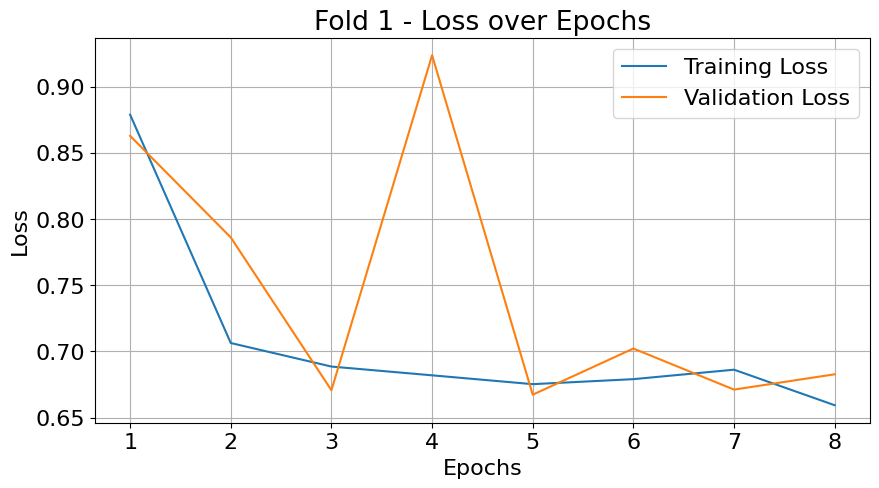

---------- Fold: 2 ----------


21it [00:21,  1.02s/it]
11it [00:05,  2.10it/s]


0:00:27 | Epoch: 1/50 | Loss: 14.57 | Acc_tr: 0.589 | Acc_vd: 0.577 | ROC: 0.602
Confusion Matrix:
[[236 102]
 [180 149]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.70      0.63       338
           1       0.59      0.45      0.51       329

    accuracy                           0.58       667
   macro avg       0.58      0.58      0.57       667
weighted avg       0.58      0.58      0.57       667



21it [00:21,  1.04s/it]
11it [00:04,  2.26it/s]


0:00:27 | Epoch: 2/50 | Loss: 14.09 | Acc_tr: 0.581 | Acc_vd: 0.576 | ROC: 0.612
Confusion Matrix:
[[206 132]
 [151 178]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.61      0.59       338
           1       0.57      0.54      0.56       329

    accuracy                           0.58       667
   macro avg       0.58      0.58      0.57       667
weighted avg       0.58      0.58      0.58       667



21it [00:22,  1.05s/it]
11it [00:04,  2.33it/s]


0:00:27 | Epoch: 3/50 | Loss: 14.44 | Acc_tr: 0.571 | Acc_vd: 0.577 | ROC: 0.619
Confusion Matrix:
[[272  66]
 [216 113]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.80      0.66       338
           1       0.63      0.34      0.44       329

    accuracy                           0.58       667
   macro avg       0.59      0.57      0.55       667
weighted avg       0.59      0.58      0.55       667



21it [00:21,  1.02s/it]
11it [00:04,  2.28it/s]

0:00:26 | Epoch: 4/50 | Loss: 13.94 | Acc_tr: 0.58 | Acc_vd: 0.579 | ROC: 0.615
Confusion Matrix:
[[259  79]
 [202 127]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.77      0.65       338
           1       0.62      0.39      0.47       329

    accuracy                           0.58       667
   macro avg       0.59      0.58      0.56       667
weighted avg       0.59      0.58      0.56       667




21it [00:21,  1.04s/it]
11it [00:04,  2.31it/s]

0:00:27 | Epoch: 5/50 | Loss: 14.27 | Acc_tr: 0.588 | Acc_vd: 0.577 | ROC: 0.613
Confusion Matrix:
[[219 119]
 [163 166]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.65      0.61       338
           1       0.58      0.50      0.54       329

    accuracy                           0.58       667
   macro avg       0.58      0.58      0.57       667
weighted avg       0.58      0.58      0.57       667

Epoch 00005: reducing learning rate of group 0 to 2.0000e-04.



21it [00:21,  1.02s/it]
11it [00:04,  2.32it/s]


0:00:26 | Epoch: 6/50 | Loss: 14.0 | Acc_tr: 0.599 | Acc_vd: 0.582 | ROC: 0.616
Confusion Matrix:
[[224 114]
 [165 164]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.66      0.62       338
           1       0.59      0.50      0.54       329

    accuracy                           0.58       667
   macro avg       0.58      0.58      0.58       667
weighted avg       0.58      0.58      0.58       667

Early stopping (no improvement since 3 models) | Best ROC: 0.6191525332278197


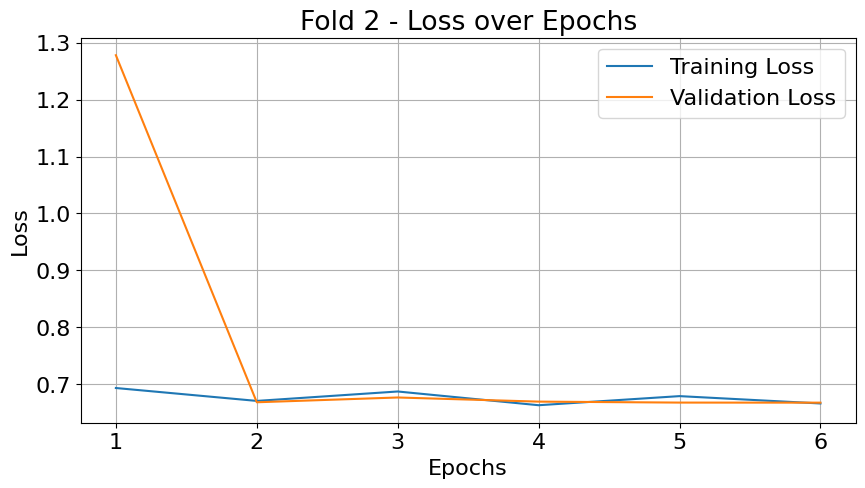

---------- Fold: 3 ----------


21it [00:21,  1.03s/it]
11it [00:04,  2.25it/s]


0:00:27 | Epoch: 1/50 | Loss: 14.15 | Acc_tr: 0.589 | Acc_vd: 0.595 | ROC: 0.625
Confusion Matrix:
[[219 115]
 [155 177]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.66      0.62       334
           1       0.61      0.53      0.57       332

    accuracy                           0.59       666
   macro avg       0.60      0.59      0.59       666
weighted avg       0.60      0.59      0.59       666



21it [00:22,  1.06s/it]
11it [00:04,  2.23it/s]

0:00:27 | Epoch: 2/50 | Loss: 14.04 | Acc_tr: 0.597 | Acc_vd: 0.589 | ROC: 0.623
Confusion Matrix:
[[228 106]
 [168 164]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.68      0.62       334
           1       0.61      0.49      0.54       332

    accuracy                           0.59       666
   macro avg       0.59      0.59      0.58       666
weighted avg       0.59      0.59      0.58       666




21it [00:21,  1.03s/it]
11it [00:05,  2.08it/s]

0:00:27 | Epoch: 3/50 | Loss: 14.13 | Acc_tr: 0.599 | Acc_vd: 0.593 | ROC: 0.622
Confusion Matrix:
[[240  94]
 [177 155]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.72      0.64       334
           1       0.62      0.47      0.53       332

    accuracy                           0.59       666
   macro avg       0.60      0.59      0.59       666
weighted avg       0.60      0.59      0.59       666

Epoch 00003: reducing learning rate of group 0 to 2.0000e-04.



21it [00:22,  1.06s/it]
11it [00:04,  2.25it/s]


0:00:27 | Epoch: 4/50 | Loss: 13.92 | Acc_tr: 0.609 | Acc_vd: 0.593 | ROC: 0.643
Confusion Matrix:
[[209 125]
 [146 186]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.63      0.61       334
           1       0.60      0.56      0.58       332

    accuracy                           0.59       666
   macro avg       0.59      0.59      0.59       666
weighted avg       0.59      0.59      0.59       666



21it [00:22,  1.06s/it]
11it [00:04,  2.25it/s]


0:00:27 | Epoch: 5/50 | Loss: 13.94 | Acc_tr: 0.606 | Acc_vd: 0.613 | ROC: 0.645
Confusion Matrix:
[[207 127]
 [131 201]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.62      0.62       334
           1       0.61      0.61      0.61       332

    accuracy                           0.61       666
   macro avg       0.61      0.61      0.61       666
weighted avg       0.61      0.61      0.61       666



21it [00:21,  1.05s/it]
11it [00:04,  2.27it/s]

0:00:27 | Epoch: 6/50 | Loss: 13.93 | Acc_tr: 0.603 | Acc_vd: 0.626 | ROC: 0.643
Confusion Matrix:
[[231 103]
 [146 186]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.69      0.65       334
           1       0.64      0.56      0.60       332

    accuracy                           0.63       666
   macro avg       0.63      0.63      0.62       666
weighted avg       0.63      0.63      0.62       666




21it [00:21,  1.05s/it]
11it [00:04,  2.22it/s]


0:00:27 | Epoch: 7/50 | Loss: 13.9 | Acc_tr: 0.605 | Acc_vd: 0.59 | ROC: 0.629
Confusion Matrix:
[[226 108]
 [165 167]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.68      0.62       334
           1       0.61      0.50      0.55       332

    accuracy                           0.59       666
   macro avg       0.59      0.59      0.59       666
weighted avg       0.59      0.59      0.59       666

Epoch 00007: reducing learning rate of group 0 to 8.0000e-05.


21it [00:21,  1.03s/it]
11it [00:04,  2.23it/s]


0:00:27 | Epoch: 8/50 | Loss: 13.92 | Acc_tr: 0.619 | Acc_vd: 0.587 | ROC: 0.632
Confusion Matrix:
[[204 130]
 [145 187]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.61      0.60       334
           1       0.59      0.56      0.58       332

    accuracy                           0.59       666
   macro avg       0.59      0.59      0.59       666
weighted avg       0.59      0.59      0.59       666

Early stopping (no improvement since 3 models) | Best ROC: 0.6449706009667412


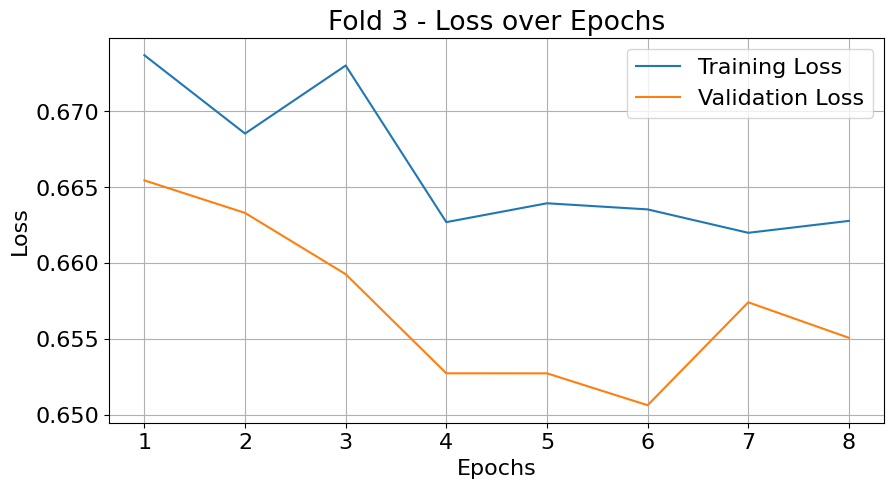

In [28]:
FOLDS = 3
EPOCHS = 50
PATIENCE = 3
WORKERS = 8
LR = 0.0005
WD = 0.0
LR_PATIENCE = 1            # 1 model not improving until lr is decreasing
LR_FACTOR = 0.4            # by how much the lr is decreasing

BATCH_SIZE1 = 64           # for train
BATCH_SIZE2 = 64          # for valid

VERSION = 'v1'
MODEL = 'resnext50'

model1 = ResNeXt50Network(output_size=output_size, no_columns=no_columns).to(DEVICE)

# ------------------

# Run the cell below to train
# Ran it locally on all data, see the results below
train_folds(model=model1, train_original=balanced_dataset)

# Print the logs during training
# f = open('/kaggle/working/logs_v1.txt', "r")
# contents = f.read()
# print(contents)